# Linear Regression Model

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
# read the data
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
# find the correlation between the columns
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


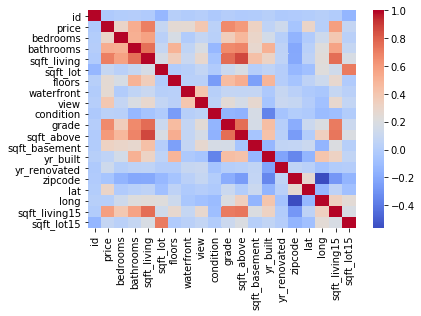

In [18]:
# visualise using heatmap
plt.figure()
sns.heatmap(data.corr(), cmap='coolwarm')
plt.show()

In [22]:
# from the correlation map we can see that there is strong relation between sqft_living and price
# so we will use this parameters to build our model
sqft = data[["sqft_living"]]
print(sqft)
price = data["price"]
print(price)

       sqft_living
0             1180
1             2570
2              770
3             1960
4             1680
...            ...
21608         1530
21609         2310
21610         1020
21611         1600
21612         1020

[21613 rows x 1 columns]
0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


In [24]:
X = np.array(sqft).reshape(-1,1)
y = np.array(price).reshape(-1,1)
print(X)
print(y)

[[1180]
 [2570]
 [ 770]
 ...
 [1020]
 [1600]
 [1020]]
[[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]


In [25]:
# split the datasetusing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)

(17290, 1)
(17290, 1)


In [26]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# calculate the inercept and coeficient
coef = model.coef_
intercept = model.intercept_
print("coefficient:", coef)
print("Intercept: ", intercept)

coefficient: [[283.96855716]]
Intercept:  [-48257.06359103]


In [38]:
# predict the data
y_prediction=model.predict(X_test)
print(y_prediction)
print(y_test)
# when we compare the y_prediction and y_test..we can see the the values have little difference which not much but also not less.

[[ 357817.97314081]
 [1277876.09832343]
 [ 360657.65871236]
 ...
 [ 337940.17413995]
 [ 221513.06570635]
 [ 417451.37014338]]
[[ 297000.]
 [1578000.]
 [ 562100.]
 ...
 [ 369950.]
 [ 300000.]
 [ 575950.]]


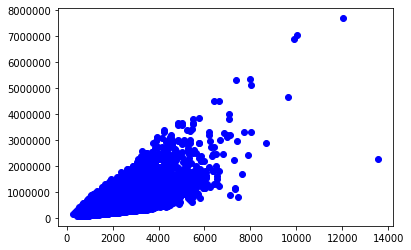

In [39]:
# lets visulaize our training sets using scatter plot
plt.scatter(X_train, y_train, color="blue")

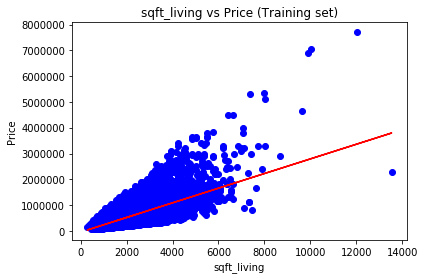

In [44]:
# plot the regression line - which is predicted values for X_train dataset
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, model.predict(X_train), color='red')
plt.title('sqft_living vs Price (Training set)')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.show()

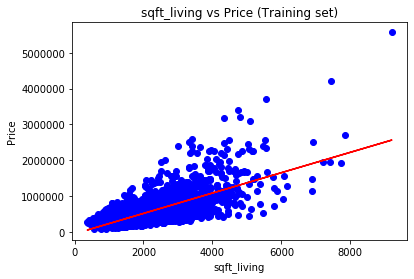

In [45]:
# now visualize the test sets
# plot the regression line - which is predicted values for X_train dataset
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, model.predict(X_test), color='red')
plt.title('sqft_living vs Price (Training set)')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.show()

In [46]:
# predict new value for the sqft_living
model.predict([[880]])

array([[201635.26670549]])

In [48]:
# caclulate the error in the model
# use root mean square evaluation methods
from sklearn.metrics import mean_squared_error
model_mse = mean_squared_error(y_test, y_prediction)
print("MSE:", model_mse)
model_rmse = np.sqrt(model_mse)
print("RMSE:", model_rmse)

MSE: 61940787124.62474
RMSE: 248879.06124185043
